### Student Information
Name: 彭敍溶

Student ID: 111164505

GitHub ID: #62976505

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

### **Part 1 : Take Home Exercise**

In [5]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [6]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [7]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [8]:
# add category to the dataframe
X['category'] = twenty_train.target

In [9]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

#### **>>> Exercise 2 (take home)** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [10]:
#Answer here

# select specific row with list
X.loc[[11, 22, 33],:]

,text,category,category_name
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
22,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
33,From: jsledd@ssdc.sas.upenn.edu (James Sledd) ...,3,soc.religion.christian


In [11]:
# select specific column with list (only show first 3 record)
X.loc[:, ["category", "category_name"]][0:3]

,category,category_name
0,1,comp.graphics
1,1,comp.graphics
2,3,soc.religion.christian


In [12]:
# select data with specific column value (only show first 3 record)
X.loc[lambda s: s['category'] == 1, :][0:3]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics


In [13]:
# select random sample 
X.sample(n=3, replace=False)

,text,category,category_name
287,From: jbickers@templar.actrix.gen.nz (John Bic...,1,comp.graphics
991,From: diablo.UUCP!cboesel (Charles Boesel) Sub...,1,comp.graphics
611,From: kxgst1@pitt.edu (Kenneth Gilbert) Subjec...,2,sci.med


In [14]:
# select data with specific row and column
# at (label based)
X.at[500, "category_name"]

'alt.atheism'

In [15]:
# select data with specific row and column
# iat (integer based)
X.iat[500, 2]

'alt.atheism'

In [16]:
# Boolean indexing
X[X['category'] != 3][0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [17]:
# Indexing with isin (only show first 5 record)
X[X.category_name.isin(["comp.graphics", "sci.med"])][0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


======================== End of Exercise 2 ========================
<br>
<br>
<br>


#### **>>> Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [18]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [19]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

It is the same problem as empty set does not equal to {empty set}. Same as {empty set} is not a empty set. The value of missing_example column in C and D is "NaN" and "None", which means there is value in its. It just happen that the value is "NaN" and "None", and there is nothing to do with null record.

======================== End of Exercise 5 ========================
<br>
<br>
<br>

In [20]:
X_sample = X.sample(n=1000,random_state=42) #random state

#### **>>> Exercise 6 (take home)**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [21]:
# Answer here
print("category distribution of X")
print("category 0: ", len(X[X['category'] == 0])/2257)
print("category 1: ", len(X[X['category'] == 1])/2257)
print("category 2: ", len(X[X['category'] == 2])/2257)
print("category 3: ", len(X[X['category'] == 3])/2257)

print()

print("category distribution of X_sample")
print("category 0: ", len(X_sample[X_sample['category'] == 0])/1000)
print("category 1: ", len(X_sample[X_sample['category'] == 1])/1000)
print("category 2: ", len(X_sample[X_sample['category'] == 2])/1000)
print("category 3: ", len(X_sample[X_sample['category'] == 3])/1000)

category distribution of X
category 0:  0.21267168808152415
category 1:  0.25875055383252105
category 2:  0.2631812140008861
category 3:  0.2653965440850687

category distribution of X_sample
category 0:  0.206
category 1:  0.247
category 2:  0.277
category 3:  0.27


The category distribution of X and X_sample is slightly different.

======================== End of Exercise 6 ========================
<br>
<br>
<br>

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

#### **>>> Exercise 8 (take home)** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [23]:
# Answer here
y1 = X.category_name.value_counts()
y2_raw = X_sample.category_name.value_counts()

x = y1.index
x_len = len(x)
y2 = []
for i in range(0, x_len):
    y2.append(y2_raw[x[i]])



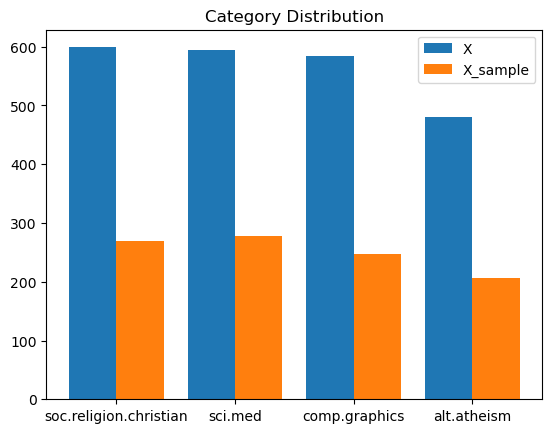

In [24]:
x_axis = np.arange(x_len)
plt.bar(x_axis - 0.2, y1, 0.4, label = "X")
plt.bar(x_axis + 0.2, y2, 0.4, label = "X_sample")
plt.xticks(x_axis, x)
plt.title("Category Distribution")
plt.legend()
plt.show()

======================== End of Exercise 8 ========================
<br>
<br>
<br>

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix


In [27]:
analyze = count_vect.build_analyzer()

#### **>>> Exercise 10 (take home)**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [28]:
# Answer here

# Find the index with value equal to 1
np.argwhere(X_counts[0:5, 0:100].toarray() == 1)


array([[ 4,  0],
       [ 4, 37]], dtype=int64)

In [29]:
count_vect.get_feature_names_out()[0]

'00'

In [30]:
count_vect.get_feature_names_out()[37]

'01'

In [31]:
# Check whether "00" and "01" are indeed in the 4th text record
analyze(X.text[4])

['from',
 'stanly',
 'grok11',
 'columbiasc',
 'ncr',
 'com',
 'stanly',
 'subject',
 're',
 'elder',
 'brother',
 'organization',
 'ncr',
 'corp',
 'columbia',
 'sc',
 'lines',
 '15',
 'in',
 'article',
 'apr',
 '00',
 '57',
 '41',
 '1993',
 '28246',
 'athos',
 'rutgers',
 'edu',
 'rexlex',
 'fnal',
 'gov',
 'writes',
 'in',
 'article',
 'apr',
 '01',
 '56',
 '56',
 '1993',
 '22824',
 'athos',
 'rutgers',
 'edu',
 'shrum',
 'hpfcso',
 'fc',
 'hp',
 'com',
 'matt',
 '22',
 '14',
 'go',
 'therefore',
 'to',
 'the',
 'main',
 'highways',
 'and',
 'as',
 'many',
 'as',
 'you',
 'find',
 'there',
 'invite',
 'to',
 'the',
 'wedding',
 'feast',
 'hmmmmmm',
 'sounds',
 'like',
 'your',
 'theology',
 'and',
 'christ',
 'are',
 'at',
 'odds',
 'which',
 'one',
 'am',
 'to',
 'believe',
 'in',
 'this',
 'parable',
 'jesus',
 'tells',
 'the',
 'parable',
 'of',
 'the',
 'wedding',
 'feast',
 'the',
 'kingdom',
 'of',
 'heaven',
 'is',
 'like',
 'unto',
 'certain',
 'king',
 'which',
 'made',
 'm

======================= End of Exercise 10 ========================
<br>
<br>
<br>

In [32]:
import seaborn as sns

#### **>>> Exercise 11 (take home)** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [33]:
# Answer here
i = 1
while True:
    temp = np.where(X_counts.toarray() > i)[1]
    if len(list(dict.fromkeys(temp))) <= 20:
        break
    i = i + 1
i

86

In [34]:
plot_x_raw = np.where(X_counts.toarray() > 86)[1]
plot_x_raw = list(dict.fromkeys(plot_x_raw))
plot_x = []
for i in plot_x_raw:
    plot_x.append("term_" + str(count_vect.get_feature_names_out()[i]))

print(len(plot_x))
#print(plot_x)
    

20


In [35]:
plot_y_raw = np.where(X_counts.toarray() > 86)[0]
plot_y_raw = list(dict.fromkeys(plot_y_raw))
plot_y = []
for i in plot_y_raw:
    plot_y.append("doc_" + str(i))

print(len(plot_y))
#print(plot_y)

35


In [36]:
plot_z = np.zeros((35, 20), dtype=int)
for i in range(0, 35):
    for j in range(0, 20):
        plot_z[i, j] = X_counts[plot_y_raw[i], plot_x_raw[j]]

,term_and,term_in,term_of,term_the,term_for,term_is,term_to,term_gif,term_if,term_image,term_it,term_jpeg,term_this,term_you,term_com,term_edu,term_that,term_jesus,term_not,term_graphics
doc_123,97,99,154,250,45,42,85,0,5,0,13,0,19,0,3,0,53,0,10,0
doc_159,22,41,68,161,8,44,74,0,8,0,31,0,24,16,0,0,39,0,11,0
doc_178,28,16,35,112,14,35,56,0,12,0,41,0,22,49,0,3,69,3,20,0
doc_209,30,37,92,153,18,29,46,0,4,0,20,0,11,0,0,0,33,0,23,0
doc_358,18,25,29,104,12,26,20,0,8,0,11,0,15,4,1,1,28,0,14,0
doc_400,207,109,165,249,157,114,135,3,13,44,76,1,25,52,16,45,39,0,16,32
doc_424,73,45,112,128,29,17,56,0,2,0,4,0,6,6,3,19,33,0,4,0
doc_432,52,43,49,105,21,43,35,0,15,0,29,0,24,5,0,2,20,0,21,0
doc_433,150,108,190,362,117,200,227,91,91,103,123,238,91,190,2,25,85,0,58,19
doc_540,55,31,92,200,11,45,27,0,4,0,22,0,2,1,0,1,30,0,26,0


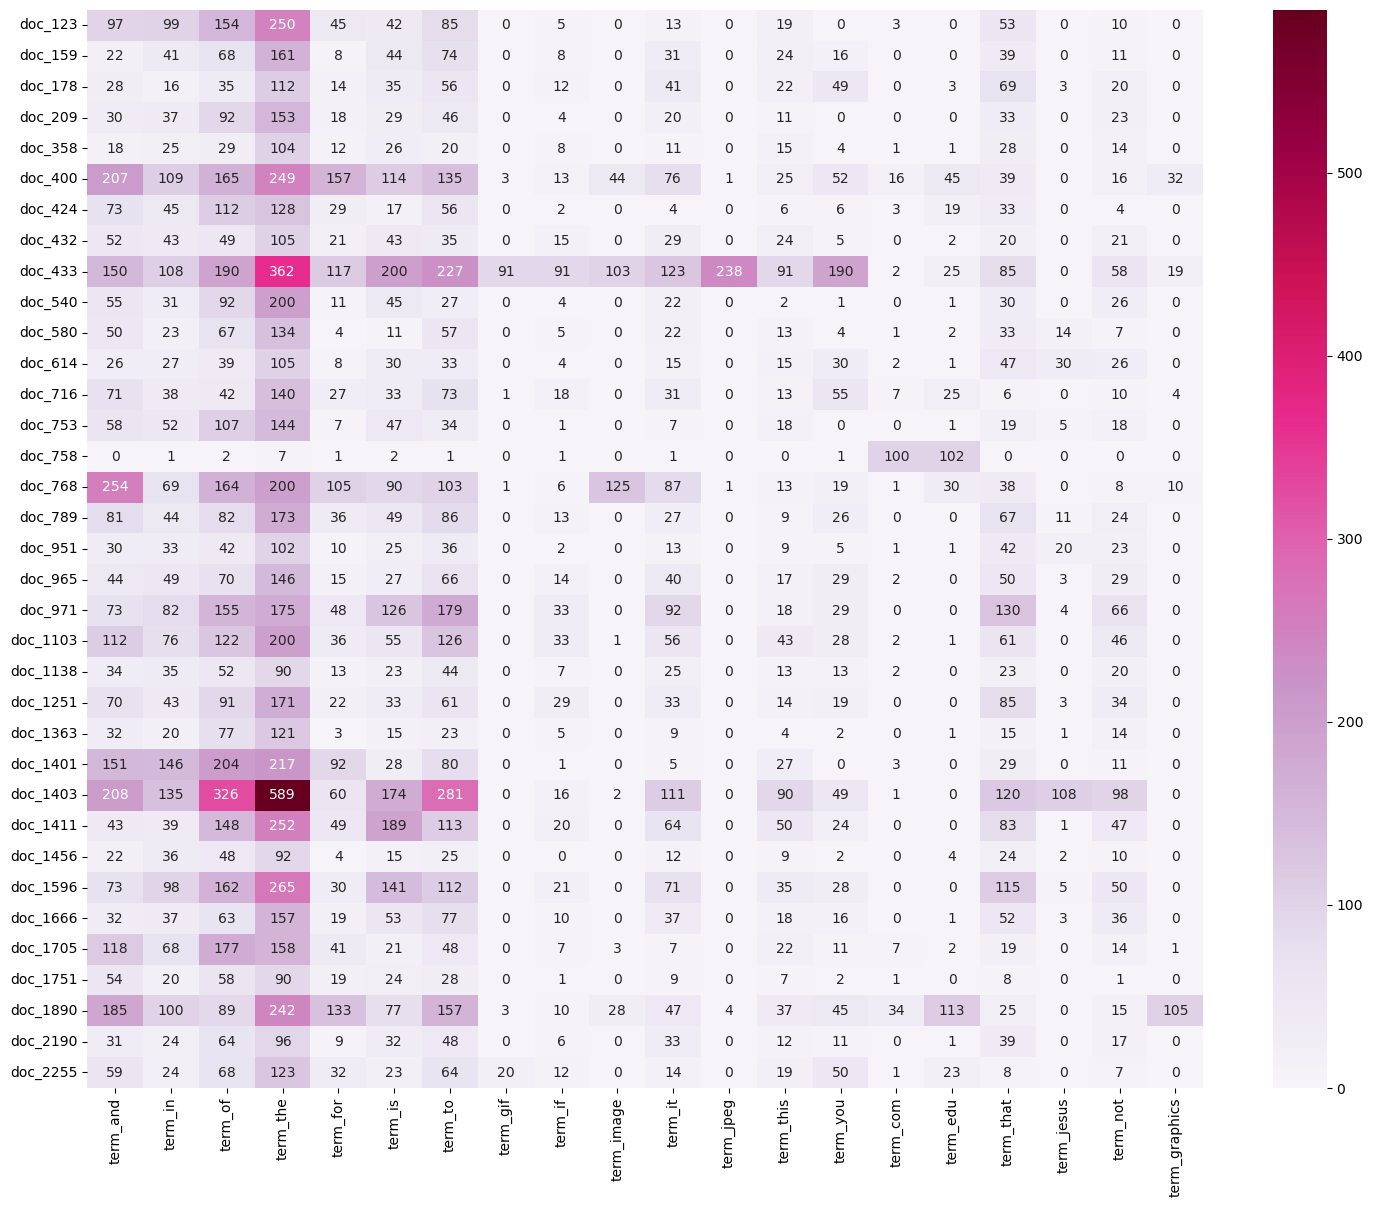

In [37]:
df_todraw_exer11 = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw_exer11)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw_exer11,
                 cmap="PuRd",
                 vmin=0, vmax=np.amax(plot_z), annot=True, fmt='d')

I find the top 20 terms which appear in a single text record most, where the term is at least appear 87 times in one text record. In the result, we can see the term "the" appear the most. Also, there are terms like "com", "edu", which may due to email format or website URL.

======================= End of Exercise 11 ========================
<br>
<br>
<br>

In [38]:
from sklearn.decomposition import PCA

#### **>>> Exercise 12 (take home)**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [39]:
# Answer here
print(X_counts.shape)
X_reduced_exer12 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_exer12.shape)

(2257, 35788)
(2257, 3)


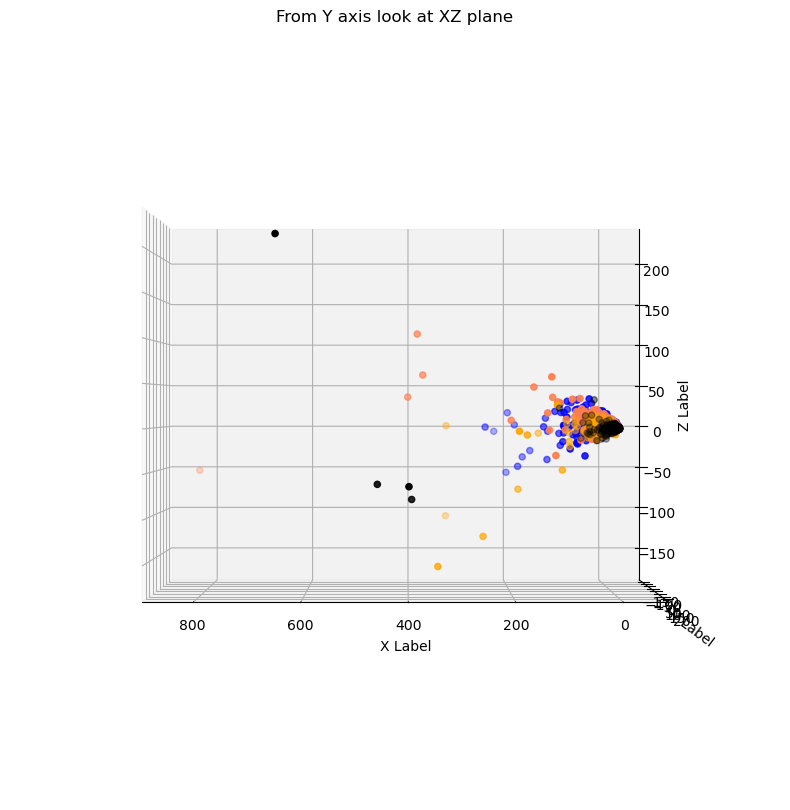

In [40]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection = "3d")

for c, category in zip(col, categories):
    xs = X_reduced_exer12[X['category_name'] == category].T[0]
    ys = X_reduced_exer12[X['category_name'] == category].T[1]
    zs = X_reduced_exer12[X['category_name'] == category].T[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

plt.title("From Y axis look at XZ plane")
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=0, azim=90)

plt.show()

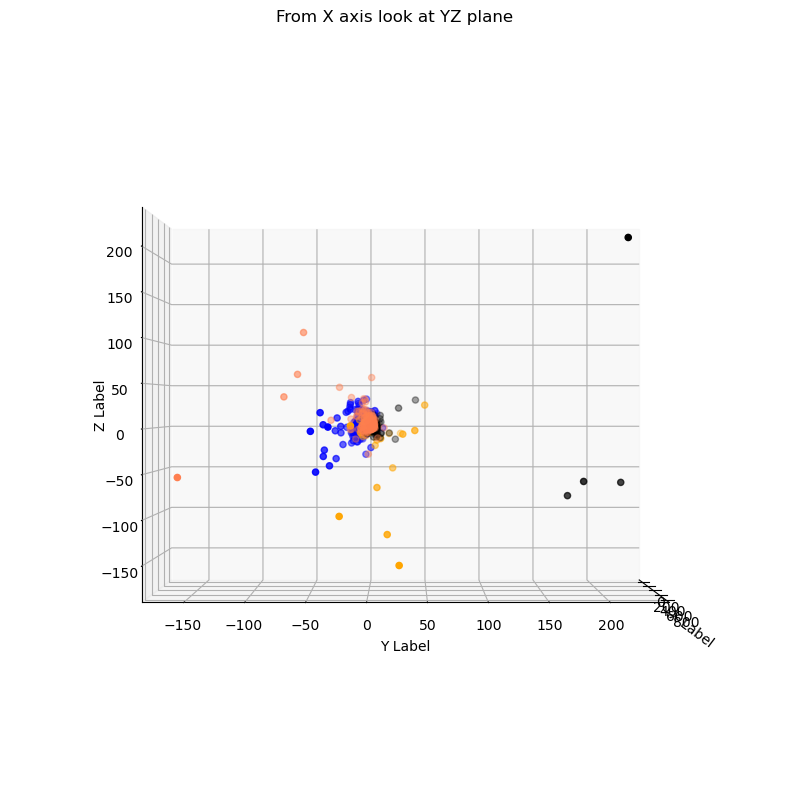

In [41]:

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection = "3d")

for c, category in zip(col, categories):
    xs = X_reduced_exer12[X['category_name'] == category].T[0]
    ys = X_reduced_exer12[X['category_name'] == category].T[1]
    zs = X_reduced_exer12[X['category_name'] == category].T[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

plt.title("From X axis look at YZ plane")
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=0, azim=0)

plt.show()

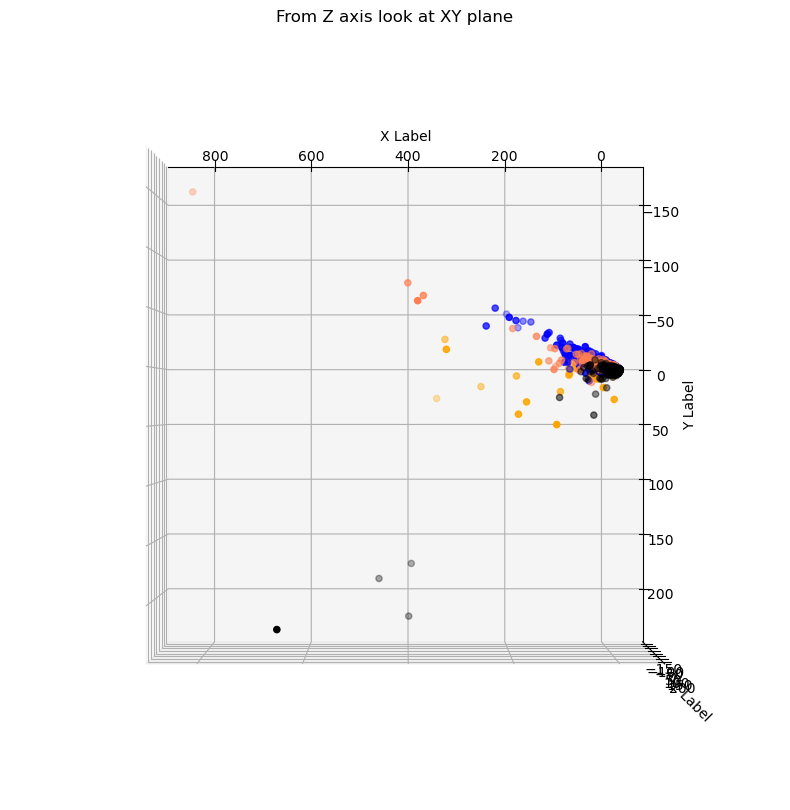

In [42]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection = "3d")

for c, category in zip(col, categories):
    xs = X_reduced_exer12[X['category_name'] == category].T[0]
    ys = X_reduced_exer12[X['category_name'] == category].T[1]
    zs = X_reduced_exer12[X['category_name'] == category].T[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

plt.title("From Z axis look at XY plane")
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=90, azim=90, roll=0)

plt.show()

Although we increase the dimension into 3, it seems that we still cannot get any idea or conclusion about the data from the above three view angle. I think it is possibly because the PCA was applied to the raw frequencies, which may not be good enough for this data set.

======================= End of Exercise 12 ========================
<br>
<br>
<br>

In [43]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

#### **>>> Exercise 13 (take home)**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [44]:
import plotly.express as px

In [45]:
# Answer here
labels = count_vect.get_feature_names_out()[:300]
value = term_frequencies[:300]
fig = px.bar(x=labels, y=value)
fig.show()

======================= End of Exercise 13 ========================
<br>
<br>
<br>

#### **>>> Exercise 14 (take home)** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [46]:
# Answer here
sort_index = sorted(range(len(term_frequencies)), key=lambda k: term_frequencies[k], reverse=True)
sort_index_top_30 = sort_index[0:30]

In [47]:
labels = count_vect.get_feature_names_out()[sort_index_top_30]
value = term_frequencies[sort_index_top_30]
fig = px.bar(x=labels, y=value, color=labels, 
             title="Top 30 Term Frequencies", 
             labels={'x': 'Term', 'y':'Frequency'})
fig.show()

======================= End of Exercise 14 ========================
<br>
<br>
<br>

#### **>>> Exercise 15 (take home)** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [48]:
# Answer here
labels = count_vect.get_feature_names_out()[sort_index[0:3000]]
value = term_frequencies[sort_index[0:3000]]

fig = px.area(x=labels, y=value)
fig.update_traces(line={'width': 4})
fig.update_xaxes(showticklabels=False, visible=False) 
fig.update_yaxes(showticklabels=False, visible=False)
fig.show()

======================= End of Exercise 15 ========================
<br>
<br>
<br>

In [49]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [50]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

#### **>>> Exercise 16 (take home)**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [51]:
# Answer here
mlb_exer16 = preprocessing.LabelBinarizer()
mlb_exer16.fit(X.category_name)

LabelBinarizer()

In [52]:
mlb_exer16.transform(X['category_name']).tolist()

[[0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1,

In [53]:
X['bin_category_name'] = mlb_exer16.transform(X['category_name']).tolist()

In [54]:
X[0:9]

,text,category,category_name,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"


From the above result, we can see that the binarization can be successfully created using category_name. The result is also same as the binarization created with category.

======================= End of Exercise 16 ========================
<br>
<br>
<br>

### **Part 2 : Follow the same process on the new dataset**

Read Data from the files first. Combine the datas from three different files into the whole dataset, and then convert into pandas dataframe.

In [55]:
file1 = open("amazon_cells_labelled.txt", "r")

dataset = []
for record in file1:
    temp_sen = record[0:(len(record) - 2)]
    temp_sen = temp_sen.split("\t")[0]
    temp_score = int(record[-2])
    temp_record = []
    temp_record.append(temp_sen)
    temp_record.append(temp_score)
    dataset.append(temp_record)

In [56]:
file2 = open("imdb_labelled.txt", "r")

for record in file2:
    temp_sen = record[0:(len(record) - 2)]
    temp_sen = temp_sen.split("\t")[0]
    temp_score = int(record[-2])
    temp_record = []
    temp_record.append(temp_sen)
    temp_record.append(temp_score)
    dataset.append(temp_record)

In [57]:
file3 = open("yelp_labelled.txt", "r")

for record in file3:
    temp_sen = record[0:(len(record) - 2)]
    temp_sen = temp_sen.split("\t")[0]
    temp_score = int(record[-2])
    temp_record = []
    temp_record.append(temp_sen)
    temp_record.append(temp_score)
    dataset.append(temp_record)

In [58]:
S = pd.DataFrame.from_records(dataset, columns= ['sentence', 'score'])
S

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


Check whether there is missing value or not. From the result below, it seems that there is no missing value.

In [59]:
S.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


After checking missing value, check whether there is duplicate data or not. From the result down below, it seems that there exist duplicate data. We then remove the duplicate data.

In [60]:
sum(S.duplicated())

17

In [61]:
len(S)

3000

In [62]:
S.drop_duplicates(keep="first", inplace=True)

In [63]:
len(S)

2983

Try some random sampling, and observe the differnce of the score distribution between the original dataset and the sample set. From the result and the visulaization down below, we can see that the score distribution is very similar between two sets.

In [64]:
S_sample = S.sample(n=1000, random_state=10)

print("score distribution of the original dataset")
print("score 0: ", len(S[S['score'] == 0])/len(S))
print("score 1: ", len(S[S['score'] == 1])/len(S))

print()

print("score distribution of the sample set")
print("score 0: ", len(S_sample[S_sample['score'] == 0])/len(S_sample))
print("score 1: ", len(S_sample[S_sample['score'] == 1])/len(S_sample))


score distribution of the original dataset
score 0:  0.5005028494803889
score 1:  0.49949715051961113

score distribution of the sample set
score 0:  0.509
score 1:  0.491


In [65]:
x = [0, 1]
x_axis = np.arange(len(x))
y1 = []
y1.append(len(S[S['score'] == 0]))
y1.append(len(S[S['score'] == 1]))
y2 = []
y2.append(len(S_sample[S_sample['score'] == 0]))
y2.append(len(S_sample[S_sample['score'] == 1]))

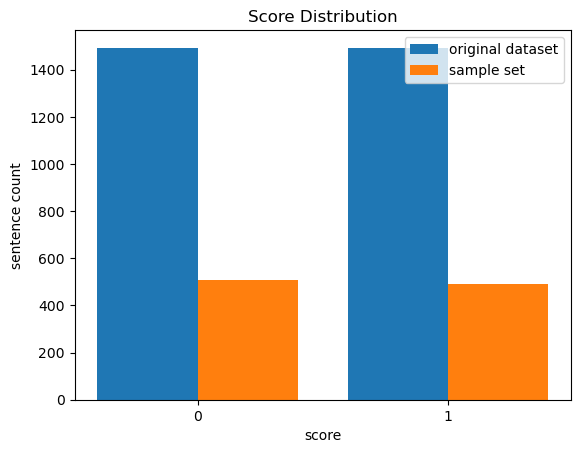

In [66]:
plt.bar(x_axis - 0.2, y1, 0.4, label = "original dataset")
plt.bar(x_axis + 0.2, y2, 0.4, label = "sample set")
plt.xticks(x_axis, x)
plt.title("Score Distribution")
plt.legend()
plt.xlabel("score")
plt.ylabel("sentence count")
plt.show()

From the vocabulary in the sentences, construct the document-term matrix. I find the top 10 terms which appear in a single sentence record most, and then draw a heat map with it. From the result, we can see the term "the" appear the most. Also, terms like "scamp" or "sucks" appear lots of times in one single sentence record, which may due to a really bad or unsatisfied feedback. 

In [67]:
count_vect = CountVectorizer()
S_counts = count_vect.fit_transform(S.sentence)
print(S_counts.shape)

(2983, 5155)


In [68]:
i = 1
while True:
    temp = np.where(S_counts.toarray() > i)[1]
    if len(list(dict.fromkeys(temp))) <= 10:
        break
    i = i + 1
i

3

In [69]:
plot_x_raw = np.where(S_counts.toarray() > 3)[1]
plot_x_raw = list(dict.fromkeys(plot_x_raw))
plot_x = []
for i in plot_x_raw:
    plot_x.append("term_" + str(count_vect.get_feature_names_out()[i]))

print(len(plot_x))
print(plot_x)

10
['term_to', 'term_the', 'term_my', 'term_and', 'term_it', 'term_of', 'term_is', 'term_scamp', 'term_that', 'term_sucks']


In [70]:
plot_y_raw = np.where(S_counts.toarray() > 3)[0]
plot_y_raw = list(dict.fromkeys(plot_y_raw))
plot_y = []
for i in plot_y_raw:
    plot_y.append("sentence_" + str(i))

print(len(plot_y))
print(plot_y)

48
['sentence_5', 'sentence_65', 'sentence_160', 'sentence_634', 'sentence_653', 'sentence_717', 'sentence_723', 'sentence_827', 'sentence_925', 'sentence_1027', 'sentence_1037', 'sentence_1059', 'sentence_1066', 'sentence_1111', 'sentence_1252', 'sentence_1265', 'sentence_1285', 'sentence_1288', 'sentence_1379', 'sentence_1404', 'sentence_1410', 'sentence_1411', 'sentence_1426', 'sentence_1452', 'sentence_1548', 'sentence_1564', 'sentence_1566', 'sentence_1576', 'sentence_1608', 'sentence_1673', 'sentence_1701', 'sentence_1731', 'sentence_1759', 'sentence_1761', 'sentence_1771', 'sentence_1786', 'sentence_1790', 'sentence_1806', 'sentence_1813', 'sentence_1869', 'sentence_1877', 'sentence_1918', 'sentence_1944', 'sentence_2514', 'sentence_2708', 'sentence_2782', 'sentence_2934', 'sentence_2953']


In [71]:
plot_z = np.zeros((48, 10), dtype=int)
for i in range(0, 48):
    for j in range(0, 10):
        plot_z[i, j] = S_counts[plot_y_raw[i], plot_x_raw[j]]
print(np.amax(plot_z))

8


,term_to,term_the,term_my,term_and,term_it,term_of,term_is,term_scamp,term_that,term_sucks
sentence_5,4,1,0,0,1,0,0,0,0,0
sentence_65,0,4,0,1,0,1,1,0,2,0
sentence_160,0,4,0,0,2,0,1,0,0,0
sentence_634,2,4,0,0,0,1,0,0,0,0
sentence_653,1,4,0,1,0,0,0,0,0,0
sentence_717,0,1,4,1,0,1,0,0,0,0
sentence_723,0,4,0,1,0,0,3,0,1,0
sentence_827,0,4,0,2,1,1,0,0,0,0
sentence_925,1,1,1,4,0,0,0,0,0,0
sentence_1027,0,0,0,0,4,0,0,0,0,0


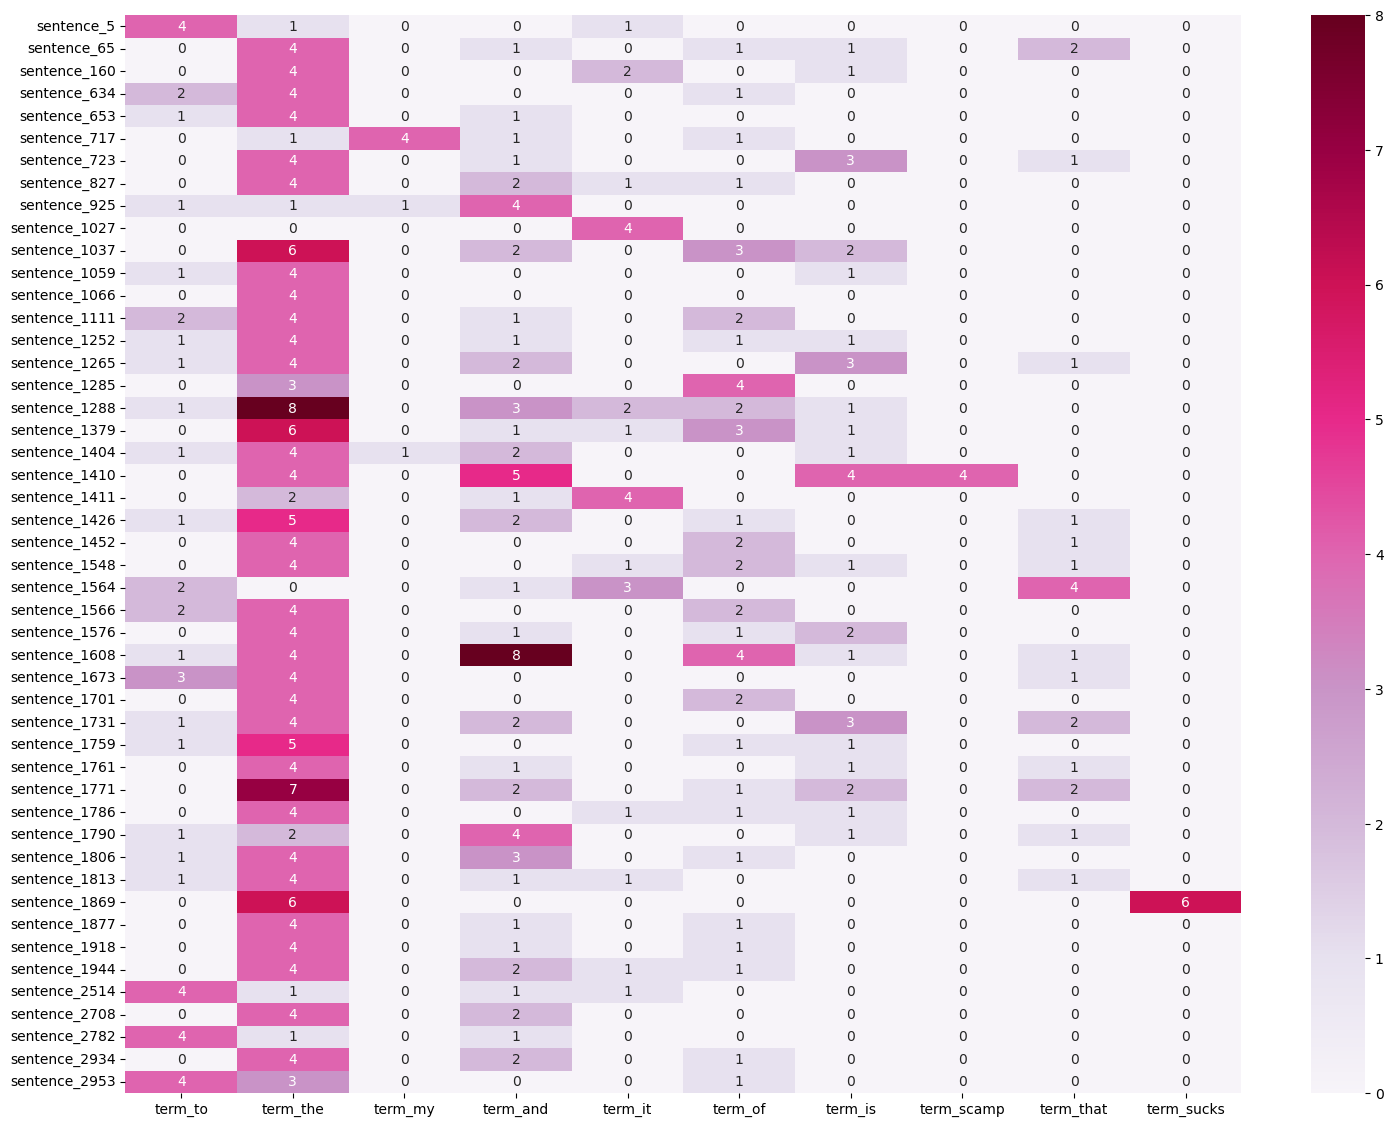

In [72]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=8, annot=True, fmt='d')

Try to reduce the dimension to 2 and 3 with PCA based on raw frequency, and visualize the result. We can observe that with 2 or 3 dimension, we still cannot classify different scores effectively. It is possibly because the PCA applied to raw frequency is not good enough for the dataset.

In [73]:
print(S_counts.shape)
S_reduced_2 = PCA(n_components = 2).fit_transform(S_counts.toarray())
print(S_reduced_2.shape)

(2983, 5155)
(2983, 2)


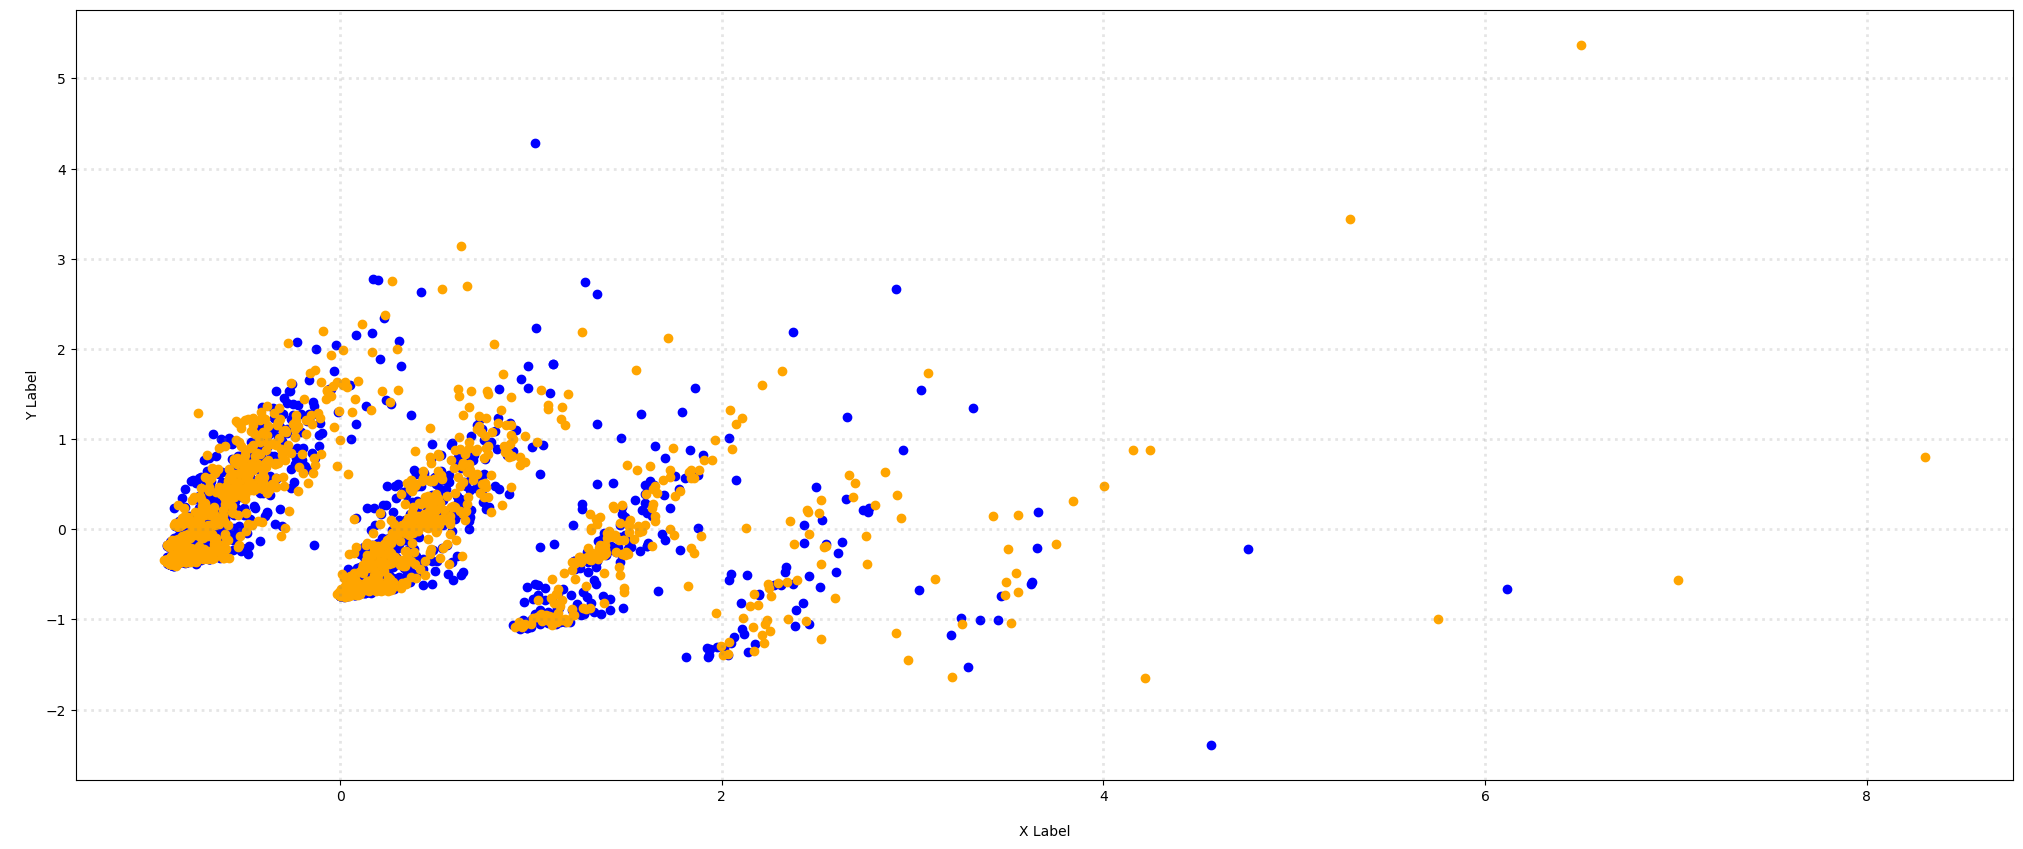

In [74]:
scores = [0, 1]
col = ['blue', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, scores):
    xs = S_reduced_2[S['score'] == score].T[0]
    ys = S_reduced_2[S['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [75]:
print(S_counts.shape)
S_reduced_3 = PCA(n_components = 3).fit_transform(S_counts.toarray())
print(S_reduced_3.shape)

(2983, 5155)
(2983, 3)


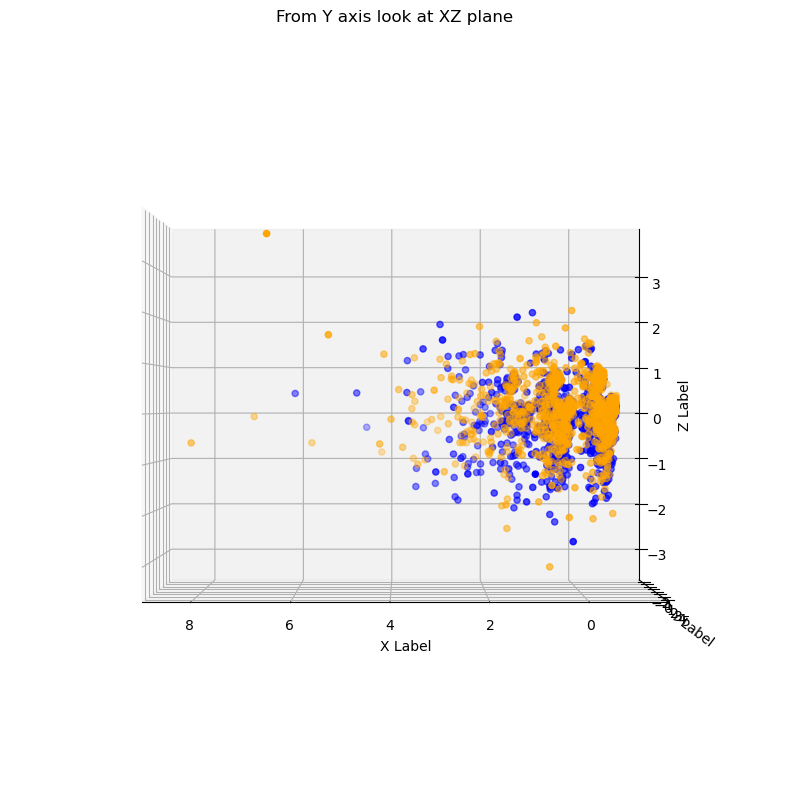

In [76]:
col = ['blue', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection = "3d")

for c, score in zip(col, scores):
    xs = S_reduced_3[S['score'] == score].T[0]
    ys = S_reduced_3[S['score'] == score].T[1]
    zs = S_reduced_3[S['score'] == score].T[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

plt.title("From Y axis look at XZ plane")
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=0, azim=90)

plt.show()

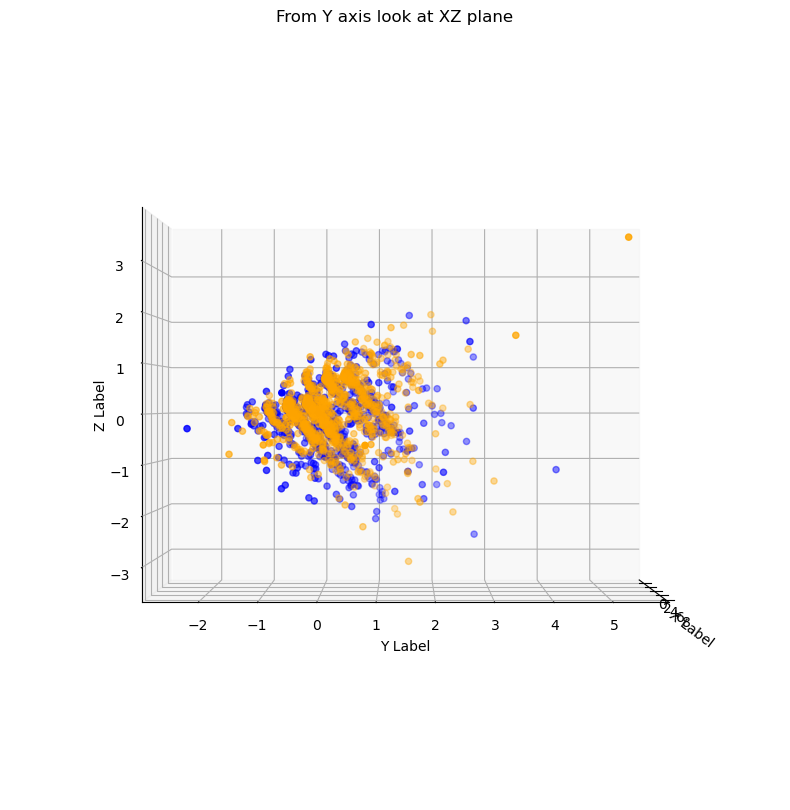

In [77]:
col = ['blue', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection = "3d")

for c, score in zip(col, scores):
    xs = S_reduced_3[S['score'] == score].T[0]
    ys = S_reduced_3[S['score'] == score].T[1]
    zs = S_reduced_3[S['score'] == score].T[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

plt.title("From Y axis look at XZ plane")
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=0, azim=0)

plt.show()

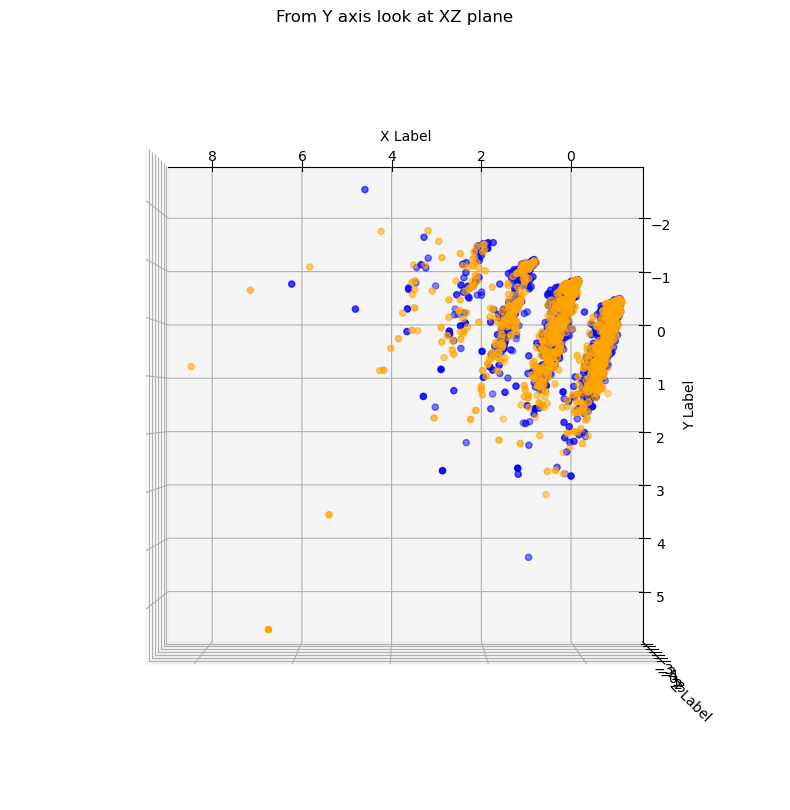

In [78]:
col = ['blue', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection = "3d")

for c, score in zip(col, scores):
    xs = S_reduced_3[S['score'] == score].T[0]
    ys = S_reduced_3[S['score'] == score].T[1]
    zs = S_reduced_3[S['score'] == score].T[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

plt.title("From Y axis look at XZ plane")
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=90, azim=90)

plt.show()

Compute term frequencies from the entire sentence set. After that, Visualize the term frequencies of the terms with top 30 frequencies.

In [79]:
S_term_frequencies = np.asarray(S_counts.sum(axis=0))[0]

In [80]:
sort_index = sorted(range(len(S_term_frequencies)), key=lambda k: S_term_frequencies[k], reverse=True)
sort_index_top_30 = sort_index[0:30]

In [81]:
labels = count_vect.get_feature_names_out()[sort_index_top_30]
value = S_term_frequencies[sort_index_top_30]
fig = px.bar(x=labels, y=value, color=labels, 
             title="Top 30 Term Frequencies", 
             labels={'x': 'Term', 'y':'Frequency'})
fig.show()

The scores from the dataset is already binary, we don't need to do binarization anymore.
<br>
<br>
<br>

### **Part 3**

#### **3-2 TF-IDF**
In this part, I calculate the TF-IDF value and visualize the result of the terms with top 30 average TD-IDF value. We can see that the result is different from what we get based on raw frequency.

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
vectorizer = TfidfVectorizer()
S_tfidf = vectorizer.fit_transform(S.sentence)

In [84]:
S_tfidf.shape

(2983, 5155)

In [85]:
print(S_tfidf[2:4])

  (0, 2449)	0.8223576509783525
  (0, 2023)	0.40205777854454006
  (0, 4531)	0.1950221671536334
  (0, 1829)	0.3521985106554204
  (1, 3482)	0.2801048711322346
  (1, 2753)	0.3588800719832273
  (1, 2890)	0.25282131715634576
  (1, 45)	0.3588800719832273
  (1, 4526)	0.21850341918119995
  (1, 2931)	0.21919677641158666
  (1, 2567)	0.34581527361462006
  (1, 1012)	0.3588800719832273
  (1, 768)	0.2775090779862662
  (1, 4589)	0.3772938710698095
  (1, 4609)	0.12067137817879812
  (1, 1829)	0.1481054188333587


#### **3-3 Naive Bayes classifier**

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(
    S_counts.toarray(), S.score, test_size=0.33, random_state=42
)

In [88]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [89]:
ac_cnt = 0
i = 0
for x in x_test:
    if model.predict([x]) == y_test.iloc[i]:
        ac_cnt += 1
    i += 1

print("Accuracy of using raw frequency")
print(ac_cnt, end="")
print("/", end="")
print(len(y_test), end="")
print(" = ", end="")
print(ac_cnt/len(y_test))

Accuracy of using raw frequency
646/985 = 0.6558375634517767


In [90]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    S_tfidf.toarray(), S.score, test_size=0.33, random_state=42
)

In [91]:
model_tfidf = GaussianNB()
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

GaussianNB()

In [92]:
ac_cnt = 0
i = 0
for x in x_test_tfidf:
    if model.predict([x]) == y_test_tfidf.iloc[i]:
        ac_cnt += 1
    i += 1

print("Accuracy of using TF-IDF")
print(ac_cnt, end="")
print("/", end="")
print(len(y_test), end="")
print(" = ", end="")
print(ac_cnt/len(y_test))

Accuracy of using TF-IDF
618/985 = 0.6274111675126903


I implement two seperate Naive Bayes Classifier which takes raw frequencies and TF-IDF as features. I take 33% of the data into testing data and the rest as training data. From the above result, the accuracy using raw frequncy is slighty better than the one using TF-IDF. Let's give a try on other random state when splitting data and oberserve the result.  

In [93]:
x_train, x_test, y_train, y_test = train_test_split(
    S_counts.toarray(), S.score, test_size=0.33, random_state=100
)

In [94]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [95]:
ac_cnt = 0
i = 0
for x in x_test:
    if model.predict([x]) == y_test.iloc[i]:
        ac_cnt += 1
    i += 1

print("Accuracy of using raw frequency")
print(ac_cnt, end="")
print("/", end="")
print(len(y_test), end="")
print(" = ", end="")
print(ac_cnt/len(y_test))

Accuracy of using raw frequency
664/985 = 0.6741116751269035


In [96]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    S_tfidf.toarray(), S.score, test_size=0.33, random_state=100
)

In [97]:
model_tfidf = GaussianNB()
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

GaussianNB()

In [98]:
ac_cnt = 0
i = 0
for x in x_test_tfidf:
    if model.predict([x]) == y_test_tfidf.iloc[i]:
        ac_cnt += 1
    i += 1

print("Accuracy of using TF-IDF")
print(ac_cnt, end="")
print("/", end="")
print(len(y_test), end="")
print(" = ", end="")
print(ac_cnt/len(y_test))

Accuracy of using TF-IDF
636/985 = 0.6456852791878173


As we change our random state, the accuracy using raw frequencies is still slightly better than the one using TF-IDF.
<br>
<br>
<br>

### **Part 4: Parts can be improved**
1. It might be better to try more random state when trying to get X_sample and compare it with X.
2. It might be better to remove the columns filtered by analyze before doing PCA.
3. Instead of using sum as term frequency, it may be intersting to try the average term appearance in the records which have at least one that term. (calculate avg exlcuding 0)